In [2]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen

In [4]:
# We import some libraries to load the dataset
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from tqdm.notebook import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

import torchtext
from torchtext.data import get_tokenizer

from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
data = []
with gzip.open('All_Beauty.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))

# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

371345
{'overall': 1.0, 'verified': True, 'reviewTime': '02 19, 2015', 'reviewerID': 'A1V6B6TNIC10QE', 'asin': '0143026860', 'reviewerName': 'theodore j bigham', 'reviewText': 'great', 'summary': 'One Star', 'unixReviewTime': 1424304000}


In [8]:
df = pd.DataFrame.from_dict(data)

print(len(df))

371345


In [9]:
print(df)

        overall  verified   reviewTime      reviewerID        asin  \
0           1.0      True  02 19, 2015  A1V6B6TNIC10QE  0143026860   
1           4.0      True  12 18, 2014  A2F5GHSXFQ0W6J  0143026860   
2           4.0      True  08 10, 2014  A1572GUYS7DGSR  0143026860   
3           5.0      True  03 11, 2013   A1PSGLFK1NSVO  0143026860   
4           5.0      True  12 25, 2011   A6IKXKZMTKGSC  0143026860   
...         ...       ...          ...             ...         ...   
371340      1.0      True  07 20, 2017  A202DCI7TV1022  B01HJEGTYK   
371341      5.0      True  03 16, 2017  A3FSOR5IJOFIBE  B01HJEGTYK   
371342      5.0      True   03 1, 2017  A1B5DK6CTP2P24  B01HJEGTYK   
371343      2.0      True  02 21, 2017  A23OUYS5IRMJS9  B01HJEGTYK   
371344      2.0      True  12 15, 2016  A24KQ9RVU81L87  B01HJEGTYK   

             reviewerName                                         reviewText  \
0       theodore j bigham                                              great   

In [10]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1.0,True,"02 19, 2015",A1V6B6TNIC10QE,0143026860,theodore j bigham,great,One Star,1424304000,NaN,NaN,NaN
1,4.0,True,"12 18, 2014",A2F5GHSXFQ0W6J,0143026860,Mary K. Byke,My husband wanted to reading about the Negro ...,... to reading about the Negro Baseball and th...,1418860800,NaN,NaN,NaN
2,4.0,True,"08 10, 2014",A1572GUYS7DGSR,0143026860,David G,"This book was very informative, covering all a...",Worth the Read,1407628800,NaN,NaN,NaN
3,5.0,True,"03 11, 2013",A1PSGLFK1NSVO,0143026860,TamB,I am already a baseball fan and knew a bit abo...,Good Read,1362960000,NaN,NaN,NaN
4,5.0,True,"12 25, 2011",A6IKXKZMTKGSC,0143026860,shoecanary,This was a good story of the Black leagues. I ...,"More than facts, a good story read!",1324771200,5,NaN,NaN


In [11]:
X = df.reviewText.values

# Changes values from [0,4] to [0,1]
y = (df.overall.values > 1).astype(int)


# Split the data into train and test
x_train_text, x_test_text, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [12]:
for s, l in zip(x_train_text[:5], y_train[:5]):
  print('{}: {}'.format(l, s))

1: Works great!
1: Works on my natural nails as well as acrylic. Easy to clean. Lasting well. The case is very nice for helping keep it clean.
1: Works great. It was a gift...
1: Good training!
1: Loved this product! The color is very pigmented and long lasting. The packaging is neat and effective. I received the package quickly. Very happy and would recommend.


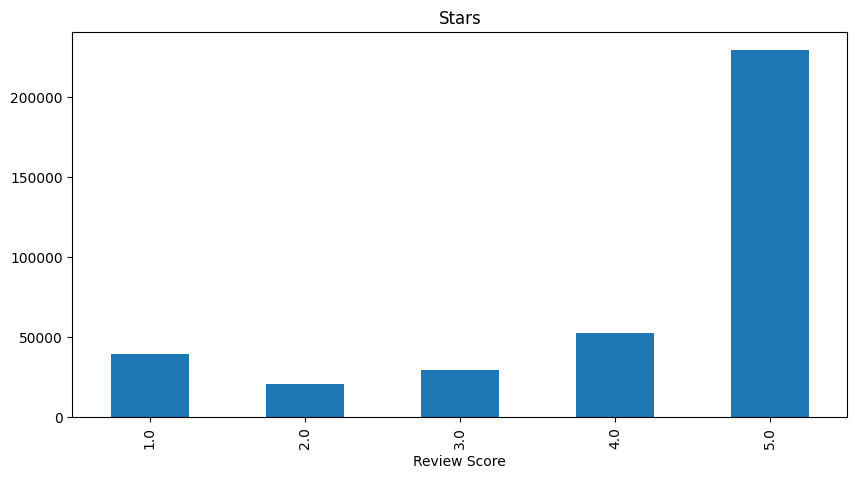

In [13]:
ax = df['overall'].value_counts().sort_index()\
    .plot(kind= 'bar', 
    title = 'Stars', 
    figsize=(10,5))
ax.set_xlabel('Review Score')
plt.show()